In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import files
import io
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [20]:
df = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
outcome                     0
dtype: int64

0 null values

In [7]:
df.duplicated().sum() #no duplicated values

0

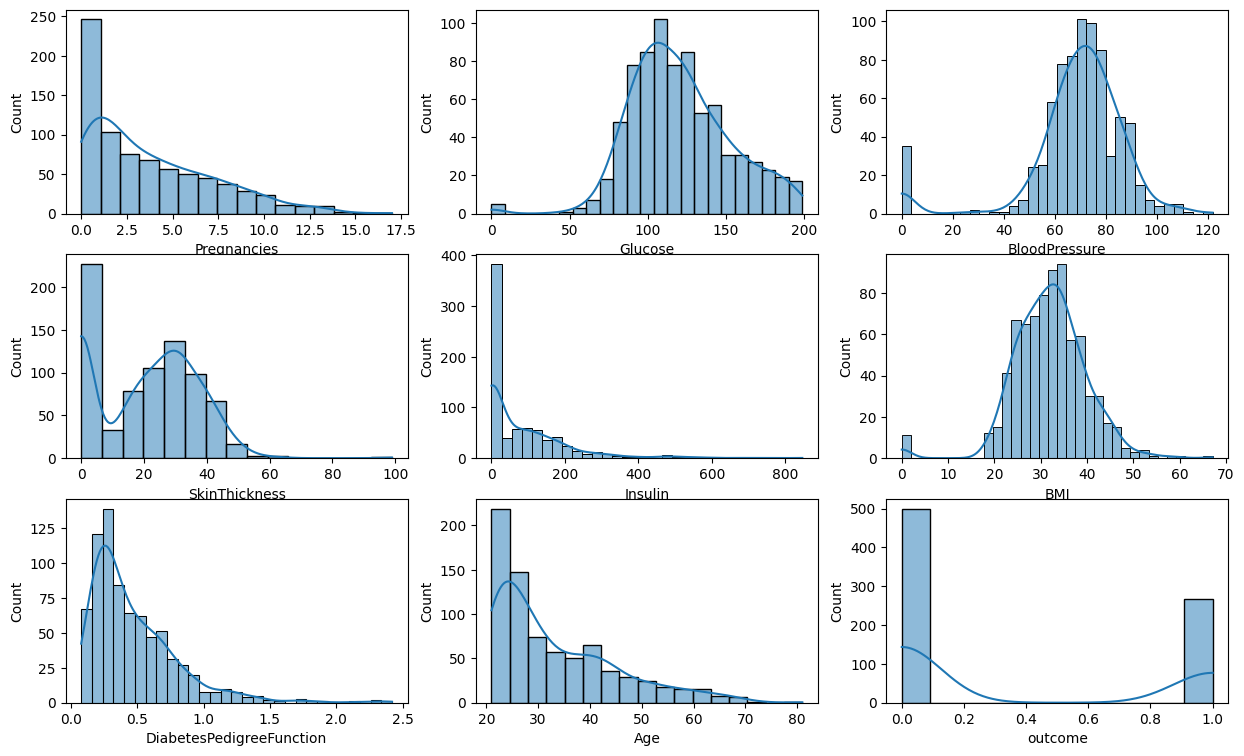

In [25]:
%matplotlib inline
fig, ax = plt.subplots(3,3,figsize=(15,9))
# This code creates a 3x3 grid of subplots using plt.subplots and sets the figure
# size to 15 inches wide by 9 inches high using figsize. The fig variable stores the entire figure,
# and the ax variable is a 3x3 array of subplots (one for each cell in the grid).
for i, col in enumerate(df):
   #i==> index of each columns
   #col==> takes each columns
    sns.histplot(data=df, x=col, ax=ax[i//3, i%3], kde =True)
plt.show()


from the map we can see that there is a lot of zero values in all the plots. it is not likely for the glucose, b.p, bmi,insulin, skin thickess etc to be zero

Removing all the columns with false zeros is not a good solution. we can replace the values with mean/median values.

Mean is most useful when the original data is not skewed, while the median is more robust, not sensitive to outliers, and thus used when data is skewed.

As can be seen in the data distribution charts, insulin, glucose and skin thickness are deviated to the right and left, so we fill them with Median. On the other hand, BMI and blood pressure have a normal distribution and we use the average to fill them

In [49]:
# convert zero to null for bmi, b, skin thickenss

df1 = df.copy()
df1[['Glucose','BloodPressure','SkinThickness','BMI','Insulin']] = df1[['Glucose','BloodPressure','SkinThickness','BMI','Insulin']].replace(0,np.NaN)

In [55]:
df1.isnull().sum()
df1['Insulin'].median()

125.0

In [52]:
# for i in ['Glucose', 'SkinThickness', 'Insulin']:
#   df_copy[i] = df_copy[i].fillna(df_copy[i].median())

# for i in ['BMI', 'BloodPressure']:
#   df_copy[i] = df_copy[i].fillna(df_copy[i].mean())

# df1[df1[col].notna()] essentially selects a new DataFrame that includes only
# the rows from df1 where the column col has valid numerical values (not NaN).

for col in ['Glucose','Insulin','SkinThickness']:
    median_col = np.median(df1[df1[col].notna()][col])
    df1[col] = df1[col].fillna(median_col)
for col in ['BMI','BloodPressure']:
    mean_col = np.mean(df1[df1[col].notna()][col])
    df1[col] = df1[col].fillna(mean_col)
df1.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
outcome                     0
dtype: int64

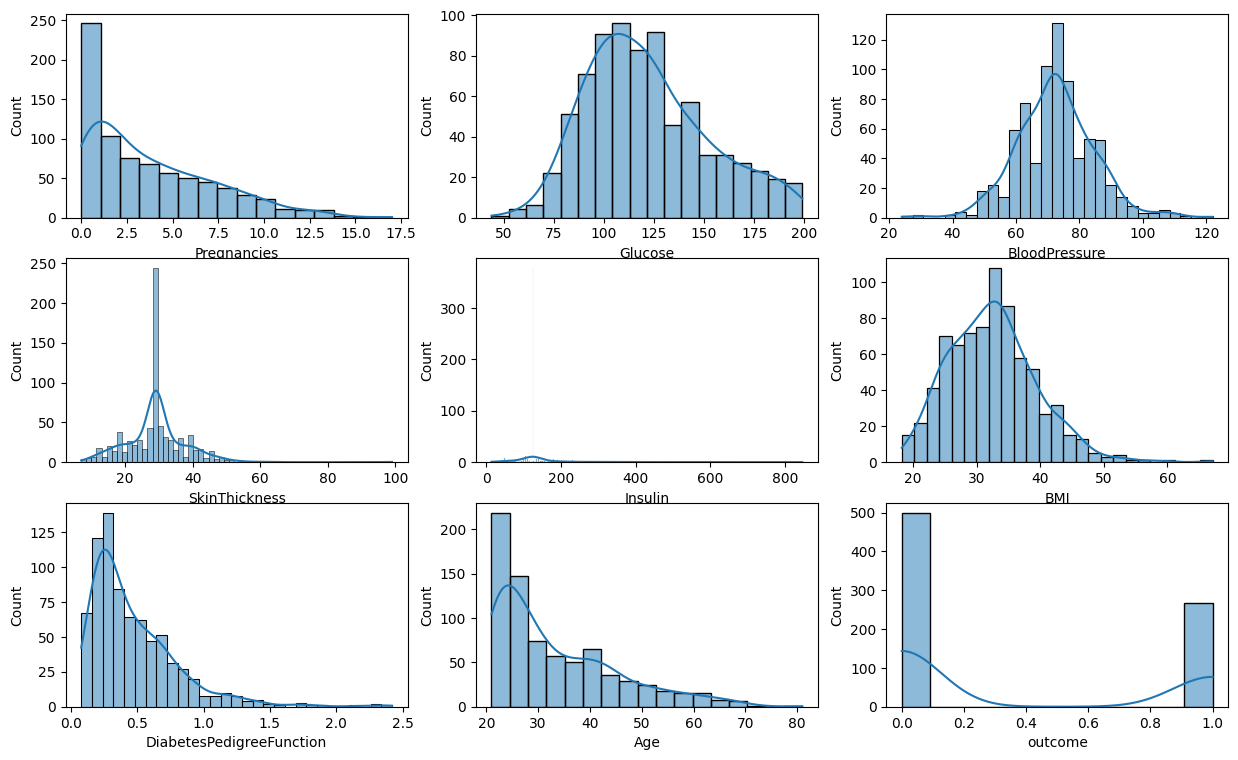

In [53]:
%matplotlib inline
fig, ax = plt.subplots(3,3,figsize=(15,9))
# This code creates a 3x3 grid of subplots using plt.subplots and sets the figure
# size to 15 inches wide by 9 inches high using figsize. The fig variable stores the entire figure,
# and the ax variable is a 3x3 array of subplots (one for each cell in the grid).
for i, col in enumerate(df1):
   #i==> index of each columns
   #col==> takes each columns
    sns.histplot(data=df1, x=col, ax=ax[i//3, i%3], kde =True)
plt.show()

In [58]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


<Axes: >

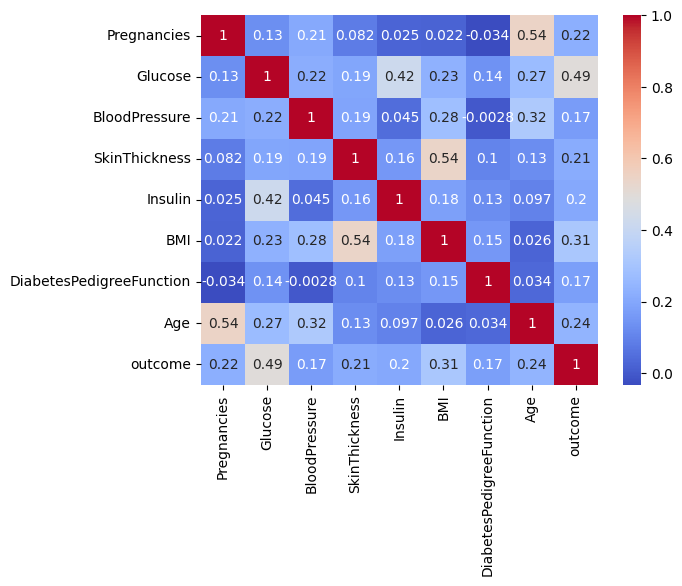

In [59]:
corr = df1.corr()
sns.heatmap(corr, annot=True, cmap ='coolwarm')
# data doesnot show much corelation

In [65]:
import plotly.graph_objects as go
fig = go.Figure()
my_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness',
           'Insulin','BMI','DiabetesPedigreeFunction','Age']
for col in my_cols:
    fig.add_trace(go.Box(y=df1[col], name=f'{col}'))
fig.update_layout(
    height=800,  # Adjust height in pixels (e.g., 600)
    width=1200   # Adjust width in pixels (e.g., 800)
)
fig.show()

In [69]:
#Model Training

x = df1.drop('outcome', axis=1)
y = df1['outcome']

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
print(x_scaled)

[[ 0.63994726  0.86604475 -0.03351824 ...  0.16629174  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20506583 -0.52985903 ... -0.85253118 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01666174 -0.69530596 ... -1.33283341  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02157407 -0.03351824 ... -0.91074963 -0.68519336
  -0.27575966]
 [-0.84488505  0.14279979 -1.02619983 ... -0.34311972 -0.37110101
   1.17073215]
 [-0.84488505 -0.94206766 -0.19896517 ... -0.29945588 -0.47378505
  -0.87137393]]


In [106]:
x = pd.DataFrame(x_scaled, columns=x.columns, index=x.index)
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.033518,0.670643,-0.181541,0.166292,0.468492,1.425995
1,-0.844885,-1.205066,-0.529859,-0.012301,-0.181541,-0.852531,-0.365061,-0.190672
2,1.233880,2.016662,-0.695306,-0.012301,-0.181541,-1.332833,0.604397,-0.105584
3,-0.844885,-1.073567,-0.529859,-0.695245,-0.540642,-0.634212,-0.920763,-1.041549
4,-1.141852,0.504422,-2.680669,0.670643,0.316566,1.548980,5.484909,-0.020496


In [94]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state= 2)

In [95]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [115]:
model.fit(x_train, y_train)

LogisticRegression()

In [116]:
y_pred = model.predict(x_train)
accuracy = model.score(x_train, y_train)
print(accuracy)

0.7837398373983739


In [117]:
from sklearn.metrics import confusion_matrix, accuracy_score
pred_accuracy = accuracy_score(y_train, y_pred)
print(pred_accuracy)

0.7837398373983739


In [118]:
y_test_pred = model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(test_accuracy)

0.7450980392156863


In [104]:
from sklearn.model_selection import KFold
# Specify number of folds (e.g., 10)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)


In [112]:
accuracy_scores = []  # List to store accuracy scores from each fold
for train_index, test_index in kfold.split(x):
    # Separate data for training and testing based on fold indices
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train Logistic Regression model

    model.fit(x_train, y_train)

    # Make predictions on test set
    y_pred = model.predict(x_test)

    # Calculate accuracy score for this fold
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Print average accuracy across all folds
average_accuracy = np.mean(accuracy_scores)
print("Average Accuracy:", average_accuracy)



Average Accuracy: 0.7695611577964518


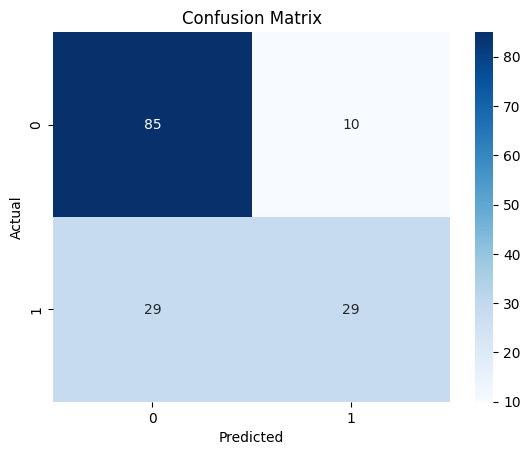

In [121]:
cm =confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()